# Eniac

![Eniac](image.jpg)

<div style="background-color: #FADBD8; color: black; border: 1px solid #e9e9e9; padding: 10px; border-radius: 5px;">
    <h2>1. INTRODUCTION</h2>
</div>


Eniac is an online marketplace specializing in Apple-compatible accessories. It was founded ten years ago in Spain and has since grown and expanded to other neighboring countries. The company and ongoing debate: **whether or not it’s beneficial to discount products.**



<div style="background-color: #FADBD8; color: black; border: 1px solid #e9e9e9; padding: 10px; border-radius: 5px;">
    <h4>1.1 PROBLEM DEFINITION</h4>
</div>

- The Marketing Team Lead is convinced that offering discounts is beneficial in the long run. She believes discounts improve customer acquisition, satisfaction and retention, and allow the company to grow.

- The main investors in the Board are worried about offering aggressive discounts. They have pointed out how the company’s recent quarterly results showed an increase in orders placed, but a decrease in the total revenue. They prefer that the company positions itself in the quality segment, rather than competing to offer the lowest prices in the market.


<div style="background-color: #FADBD8; color: black; border: 1px solid #e9e9e9; padding: 10px; border-radius: 5px;">
    <h4>1.2 DATA SOURCE</h4>
</div>

The data is made available by Eniac, the data is internal data, which is not anonymised. The datasets contain data from January 2017 - April 2018. The data is not available anywhere else.

<div style="background-color: #FADBD8; color: black; border: 1px solid #e9e9e9; padding: 10px; border-radius: 5px;">
    <h4>1.3 PROJECT PURPOSE</h4>
</div>

Reveal more concrete analysis to determine whether offering discounts is beneficial for the company by analysing discounts through looking at the orders completed and the products that have been sold. 
Furthermore a thorough clarification is required on whether revenue grows whenever discounts increase.

The project aims to answer the following business questions:

- How should products be classified into different categories to simplify reports and analysis?
- What is the distribution of product prices across different categories?
- How many products are being discounted?
- How big are the offered discounts as a percentage of the product prices?
- How do seasonality and special dates (Christmas, Black Friday) affect sales?
- How could data collection be improved?



<div style="background-color: #FADBD8; color: black; border: 1px solid #e9e9e9; padding: 10px; border-radius: 5px;">
    <h4>1.3 PROJECT SCOPE</h4>
</div>

The project will consist of Exploratory Data Analysis (EDA) where the data will be explored closely as well as visualised.

This will be accomplished by:
* transforming a complex dataset into a clean & trustable source ready for insight extraction
* using Python to create plots that convey a clear message
* story telling in the form of a dashboard

<div style="background-color: #FADBD8; color: black; border: 1px solid #e9e9e9; padding: 10px; border-radius: 5px;">
    <h2>2. EXPLORATORY DATA ANALYSIS</h2>
</div>

<div style="background-color: #FADBD8; color: black; border: 1px solid #e9e9e9; padding: 10px; border-radius: 5px;">
    <h4>2.1 IMPORTING LIBRARIES</h4>
</div>

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 1000)
pd.set_option("display.max_colwidth", 100)
pd.set_option("display.float_format", lambda x: "%.2f" % x)
pd.set_option("display.max_rows", 1000)

<div style="background-color: #FADBD8; color: black; border: 1px solid #e9e9e9; padding: 10px; border-radius: 5px;">
    <h4>2.2 DATA PREPARATION</h4>
</div>

The tool of choice for this case study is Python Pandas, to analyse, due to working with a large dataset and enable strong visualisations that will support the recommendations at the end of the project. 

The .csv files in this notebook contain data that has already been cleaned. We are working with 3 tables in this projects
- products table
- orders table
- orderlines table 

Furthermore, the datasets only contains orders that were purchased, in this case they have the order state as "Completed". This will give us more accurate insights during the analysis phase. 

<div style="background-color: #FADBD8; color: black; border: 1px solid #e9e9e9; padding: 10px; border-radius: 5px;">
    <h5>2.3 IMPORTING DATASETS</h5>
</div>

importing datasets through the .csv files in the Eniac database. We will only work with 3 that will be useful to make an informed analysis of Eniac's discounts and revenue

In [73]:
products_cl = pd.read_csv('products_cl.csv')
orderlines_qu = pd.read_csv('orderlines_qu.csv')
orders_qu = pd.read_csv('orders_qu.csv')
brands = pd.read_csv('brands.csv')

<div style="background-color: #FADBD8; color: black; border: 1px solid #e9e9e9; padding: 10px; border-radius: 5px;">
    <h5>2.4 PREVIEW DATASETS</h5>
</div>

In [74]:
products_cl.head()
print(products_cl.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9992 entries, 0 to 9991
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sku       9992 non-null   object 
 1   name      9992 non-null   object 
 2   desc      9992 non-null   object 
 3   price     9992 non-null   float64
 4   in_stock  9992 non-null   int64  
 5   type      9946 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 468.5+ KB
None


In [75]:
orderlines_qu.head()
print(orderlines_qu.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53231 entries, 0 to 53230
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                53231 non-null  int64  
 1   id_order          53231 non-null  int64  
 2   product_id        53231 non-null  int64  
 3   product_quantity  53231 non-null  int64  
 4   sku               53231 non-null  object 
 5   unit_price        53231 non-null  float64
 6   date              53231 non-null  object 
dtypes: float64(1), int64(4), object(2)
memory usage: 2.8+ MB
None


In [76]:
orders_qu.head()
print(orders_qu.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40985 entries, 0 to 40984
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   order_id      40985 non-null  int64  
 1   created_date  40985 non-null  object 
 2   total_paid    40985 non-null  float64
 3   state         40985 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.3+ MB
None


In [77]:
brands.head()
print(brands.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   short   187 non-null    object
 1   long    187 non-null    object
dtypes: object(2)
memory usage: 3.1+ KB
None


<div style="background-color: #FADBD8; color: black; border: 1px solid #e9e9e9; padding: 10px; border-radius: 5px;">
    <h5>2.4 CHECK MISSING VALUES</h5>
</div>

In [78]:
#Double check if there are any missing values

products_cl.isna().sum()

sku          0
name         0
desc         0
price        0
in_stock     0
type        46
dtype: int64

In [79]:
orderlines_qu.isna().sum()

id                  0
id_order            0
product_id          0
product_quantity    0
sku                 0
unit_price          0
date                0
dtype: int64

In [80]:
orders_qu.isna().sum()


order_id        0
created_date    0
total_paid      0
state           0
dtype: int64

In [81]:
brands.isna().sum()

short    0
long     0
dtype: int64

<div style="background-color: #FADBD8; color: black; border: 1px solid #e9e9e9; padding: 10px; border-radius: 5px;">
    <h5>2.5 QUALITATIVE MEASURES OF THE DATA</h5>
</div>

In [82]:
products_cl.describe()

,price,in_stock
count,9992.00,9992.00
mean,667.35,0.20
std,1365.54,0.40
min,2.99,0.00
25%,42.99,0.00
50%,112.99,0.00
75%,660.69,0.00
max,15339.00,1.00


In [83]:
orderlines_qu.describe()

,id,id_order,product_id,product_quantity,unit_price
count,53231.00,53231.00,53231.00,53231.00,53231.00
mean,1384718.16,414086.77,0.00,1.13,135.48
std,151104.84,65584.82,0.00,0.82,180.72
min,1119116.00,241423.00,0.00,1.00,1.99
25%,1263015.00,362219.50,0.00,1.00,26.99
50%,1388530.00,416762.00,0.00,1.00,64.99
75%,1512672.50,469651.50,0.00,1.00,154.00
max,1649593.00,527112.00,0.00,72.00,999.99


In [84]:
orders_qu.describe()

,order_id,total_paid
count,40985.00,40985.00
mean,414728.34,194.67
std,65935.02,250.51
min,241423.00,2.82
25%,362317.00,46.98
50%,417508.00,98.04
75%,470672.00,244.99
max,527112.00,6876.94


<div style="background-color: #FADBD8; color: black; border: 1px solid #e9e9e9; padding: 10px; border-radius: 5px;">
    <h5>2.6 INITIAL FINDINGS</h5>
</div>

Looking at the summary of the dataset, we can see that date column in the orders_qu and orderlines_qu datasets is not in the correct datetime data type. 
It is good practice to work with data in it's correct/appropriate format. 
However, before we change the data type we will merge the tables first and then change the data type to the correct format. 

##### Merging datasets
To be able to analyse the data better and faster, we merge tables to have one dataframe that will become our main analysis table  

In [85]:
eniac_df = orderlines_qu.merge(products_cl, on='sku',how='inner')

##### Preview merged dataframe
The merged dataframe only contains one date column which we can now easily change it's data type easiy in the next steps

In [86]:
eniac_df.head(3)

,id,id_order,product_id,product_quantity,sku,unit_price,date,name,desc,price,in_stock,type
0,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,OWC In-line Digital Temperature Sensor Kit HDD iMac 2011,Kit temperature sensor for HDD iMac 21 inch and 27 inch 2011.,60.99,1,12755395
1,1120182,299404,0,1,OWC0100,47.49,2017-01-01 22:50:39,OWC In-line Digital Temperature Sensor Kit HDD iMac 2011,Kit temperature sensor for HDD iMac 21 inch and 27 inch 2011.,60.99,1,12755395
2,1121550,300650,0,1,OWC0100,49.99,2017-01-02 15:31:09,OWC In-line Digital Temperature Sensor Kit HDD iMac 2011,Kit temperature sensor for HDD iMac 21 inch and 27 inch 2011.,60.99,1,12755395


In [87]:
eniac_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53231 entries, 0 to 53230
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                53231 non-null  int64  
 1   id_order          53231 non-null  int64  
 2   product_id        53231 non-null  int64  
 3   product_quantity  53231 non-null  int64  
 4   sku               53231 non-null  object 
 5   unit_price        53231 non-null  float64
 6   date              53231 non-null  object 
 7   name              53231 non-null  object 
 8   desc              53231 non-null  object 
 9   price             53231 non-null  float64
 10  in_stock          53231 non-null  int64  
 11  type              53220 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 5.3+ MB


##### Changing Date Format

In [88]:
#change date column to date data type
eniac_df['date'] = pd.to_datetime(eniac_df['date'])

In [89]:
eniac_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53231 entries, 0 to 53230
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                53231 non-null  int64         
 1   id_order          53231 non-null  int64         
 2   product_id        53231 non-null  int64         
 3   product_quantity  53231 non-null  int64         
 4   sku               53231 non-null  object        
 5   unit_price        53231 non-null  float64       
 6   date              53231 non-null  datetime64[ns]
 7   name              53231 non-null  object        
 8   desc              53231 non-null  object        
 9   price             53231 non-null  float64       
 10  in_stock          53231 non-null  int64         
 11  type              53220 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(5), object(4)
memory usage: 5.3+ MB


In [90]:
eniac_df.describe()

,id,id_order,product_id,product_quantity,unit_price,price,in_stock
count,53231.00,53231.00,53231.00,53231.00,53231.00,53231.00,53231.00
mean,1384718.16,414086.77,0.00,1.13,135.48,161.60,0.57
std,151104.84,65584.82,0.00,0.82,180.72,202.49,0.49
min,1119116.00,241423.00,0.00,1.00,1.99,2.99,0.00
25%,1263015.00,362219.50,0.00,1.00,26.99,35.99,0.00
50%,1388530.00,416762.00,0.00,1.00,64.99,87.98,1.00
75%,1512672.50,469651.50,0.00,1.00,154.00,179.99,1.00
max,1649593.00,527112.00,0.00,72.00,999.99,1799.00,1.00


<div style="background-color: #FADBD8; color: black; border: 1px solid #e9e9e9; padding: 10px; border-radius: 5px;">
    <h5>2.7 REVENUE GROWTH AND DISCONT INCREASE </h5>
</div>


We analyse trends and patterns of the revenue for Eniac when discounts are applied to products, this will help us find out whether offering discounts is beneficial for the company. Which is the goal of the company

##### adding discount and revenue coloumns
In order to gain more insights and answer business questions, we will need to create a discount and revenue column. From these columns we can calculate the differences, find the highest discounts offered, the correlation between the revenue and discount and so on. 

In [91]:
#discount= products.price - orderlines.unit_price
discount = eniac_df['discount']= eniac_df['price'] - eniac_df['unit_price']

In [92]:
# revenue = unit_price * product_quantity
revenue = eniac_df['revenue'] = eniac_df['unit_price']* eniac_df['product_quantity']

In [93]:
#check that column is added to dataframe
eniac_df.head(3)


,id,id_order,product_id,product_quantity,sku,unit_price,date,name,desc,price,in_stock,type,discount,revenue
0,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,OWC In-line Digital Temperature Sensor Kit HDD iMac 2011,Kit temperature sensor for HDD iMac 21 inch and 27 inch 2011.,60.99,1,12755395,13.50,47.49
1,1120182,299404,0,1,OWC0100,47.49,2017-01-01 22:50:39,OWC In-line Digital Temperature Sensor Kit HDD iMac 2011,Kit temperature sensor for HDD iMac 21 inch and 27 inch 2011.,60.99,1,12755395,13.50,47.49
2,1121550,300650,0,1,OWC0100,49.99,2017-01-02 15:31:09,OWC In-line Digital Temperature Sensor Kit HDD iMac 2011,Kit temperature sensor for HDD iMac 21 inch and 27 inch 2011.,60.99,1,12755395,11.00,49.99


##### Analyse whether revenue grows whenever discounts increase

In [94]:
discount_revenue_corr = eniac_df['discount'].corr(eniac_df['revenue'])
discount_revenue_corr

0.3414925002370038

(0.0, 1394.5495)

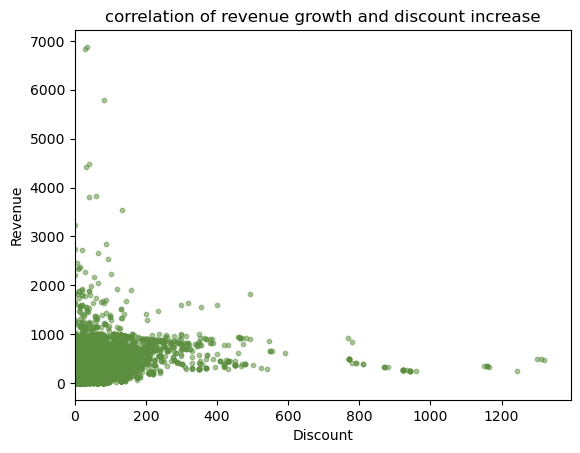

In [95]:
# create a scatterplot)
correlation = eniac_df.plot(kind= 'scatter', x= 'discount', y= 'revenue', title='correlation of revenue growth and discount increase', xlabel= 'Discount', ylabel= 'Revenue', s=10, c='#5b8f3f', alpha=0.5);
correlation.set_xlim(left=0)

In [ ]:
Revenue during 
peak sales months
€3,296,464.48 

From the visualisation and the correlation coefficient of 0.3415 we can see that there is a positive correlation between revenue and discount. However, it does not show an increase in revenue when there is an increase in discounts. 
The visualisation shows a High-Discount, Low-Revenue which may be due to a number of factors which we will explore 
- potential outliers such as events or patterns that are not usual
- products or product type (category)
- customers lack of motivation to make purchases even when provided discounts

<div style="background-color: #FADBD8; color: black; border: 1px solid #e9e9e9; padding: 10px; border-radius: 5px;">
    <h5>2.8 SEASONAL PATTERNS AND SALES TRENDS </h5>
</div>


Here we analyse whether seasonality and special dates, to see if they have any impact on sales.

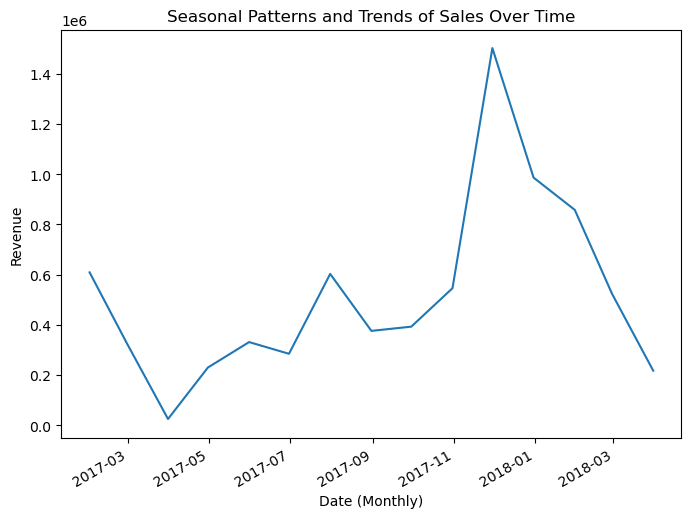

In [97]:
#seasonal patterns in the evolution of sales 
eniac_df.resample('M', on= 'date')['revenue'].sum().sort_values(ascending=False).plot(figsize=(8, 6), grid=False)
plt.xlabel('Date (Monthly)')
plt.ylabel('Revenue')
plt.title('Seasonal Patterns and Trends of Sales Over Time');


In [98]:
# monthly revenue
eniac_df.resample('M', on= 'date')['revenue'].sum()

date
2017-01-31    609260.70
2017-02-28    327483.46
2017-03-31     25508.97
2017-04-30    230379.32
2017-05-31    331725.55
2017-06-30    285107.03
2017-07-31    603124.23
2017-08-31    376329.62
2017-09-30    393137.39
2017-10-31    546188.25
2017-11-30   1502265.95
2017-12-31    986525.71
2018-01-31    858061.28
2018-02-28    524214.32
2018-03-31    217892.62
Freq: M, Name: revenue, dtype: float64

In [ ]:
#eniac_df.groupby([eniac_df["date"].dt.year, eniac_df["date"].dt.month])["product_quantity"].sum().plot(figsize=(8,6));

The visualisation shows a notable surge in revenue between the months of November to January likely attributed to the
holiday season. Additionally, the month of November stands out possibly because of the Black Friday sales and discounts. 

A decline in revenue is evident in the months of March and April. This dip in sales aligns with start of the year when many customers have already made significant purchases during the Christmas season. 

<div style="background-color: #FADBD8; color: black; border: 1px solid #e9e9e9; padding: 10px; border-radius: 5px;">
    <h5>2.9 PRODUCT CATEGORY IMPACT ON REVENUE & DISCOUNTS </h5>
</div>

As a starting point of our analysis of product categories and sales, we will identify the top performing brands by product quantity therefore product sales. The following visualisation below will provide a clear representation of the top 10 brands will the highest products sold.



In [99]:
# create a new dataframe that merges brand table with our existing eniac_df dataframe.
eniac_df["short"] = eniac_df["sku"].str[:3]

In [100]:
eniac_df = eniac_df.merge(brands,
                                how="left",
                                left_on="short",
                                right_on="short")

In [70]:
top_brands_df = eniac_df.groupby("long", as_index=False)["product_quantity"].sum().nlargest(15, "product_quantity")
top_brands_df.head(3)                     


,long,product_quantity
5,Apple,11156
99,OWC,3857
161,Western Digital,2404


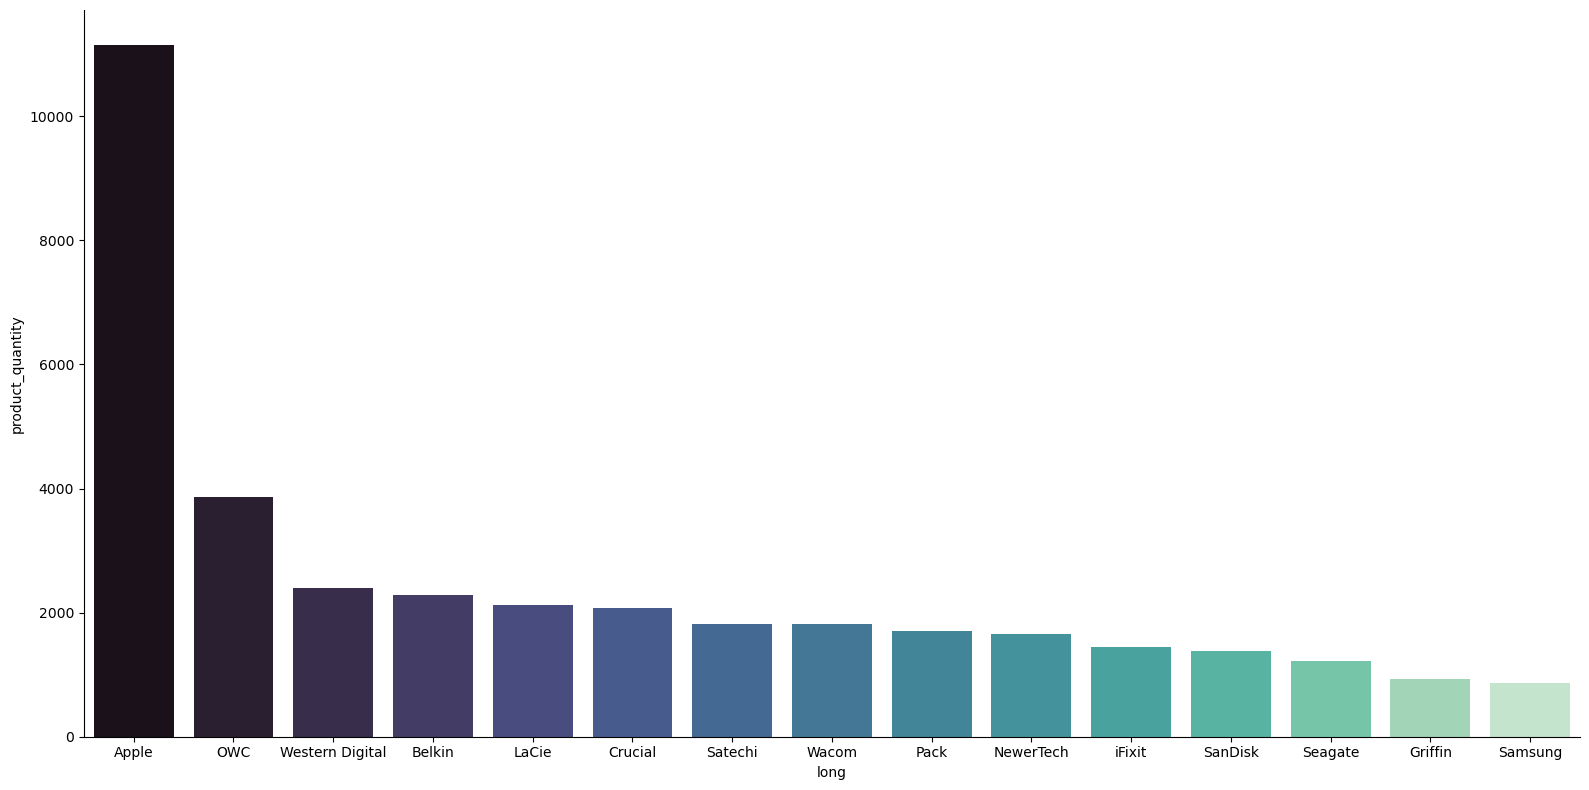

In [101]:
# plot the best performing brands
sns.catplot(kind="bar",
            data=top_brands_df,
            x="long",
            y="product_quantity",
            height=8,
            aspect=2,
            palette="mako");

The visualisation shows that the Apple brand stands out as the top performing brand out of the 10 brands, with a remarkable sales volume of over 10,000 products. This is a stark contracts with the other brands in the dataset, where product quantities sold typically fall below 4,000. To gain a deeper understanding of this notable disparity, further analysis is requited to uncover the underlying factors driving Apple's exceptional performance. 


With our list of the Top 10 best performing brands, we can proceed to categorise the products sold. Following this, we will delve into the discounts for products within these selected brand categories.

In [102]:
#create an empty 'category' column in our dataframe
eniac_df["category"] = ""

In [103]:
# diffferent categories for different products

eniac_df.loc[eniac_df["desc"].str.contains("keyboard", case=False), "category"] += ", keyboard"
eniac_df.loc[eniac_df["name"].str.contains("^.{0,7}apple iphone", case=False), "category"] += ", smartphone"
eniac_df.loc[eniac_df["name"].str.contains("^.{0,7}apple ipod", case=False), "category"] += ", ipod"
eniac_df.loc[eniac_df["name"].str.contains("^.{0,7}apple ipad|tablet", case=False), "category"] += ", tablet"
eniac_df.loc[eniac_df["name"].str.contains("imac|mac mini|mac pro", case=False), "category"] += ", desktop"
eniac_df.loc[eniac_df["name"].str.contains("macbook", case=False), "category"] += ", laptop"
eniac_df.loc[eniac_df["desc"].str.contains("backpack", case=False), "category"] += ", backpack"
eniac_df.loc[eniac_df["desc"].str.contains("case|funda|housing|casing|folder", case=False), "category"] += ", case"
eniac_df.loc[eniac_df["desc"].str.contains("dock|hub|connection|expansion box", case=False), "category"] += ", dock"
eniac_df.loc[eniac_df["desc"].str.contains("cable|connector|lightning to usb|wall socket|power strip", case=False), "category"] += ", cable"
eniac_df.loc[eniac_df["desc"].str.contains("flash drive|hard drive|pendrive|hard disk|memory|storage|^ssd|^hardssd|modules|ssd expansion", case=False), "category"] = ", storage"
eniac_df.loc[eniac_df["desc"].str.contains("battery", case=False), "category"] += ", battery"
eniac_df.loc[eniac_df["desc"].str.contains("headset|headphones", case=False), "category"] += ", headset"
eniac_df.loc[eniac_df["desc"].str.contains("charger", case=False), "category"] += ", charger"
eniac_df.loc[eniac_df["desc"].str.contains("mouse|trackpad", case=False), "category"] += ", mouse"
eniac_df.loc[eniac_df["desc"].str.contains("stand|support", case=False), "category"] += ", stand"
eniac_df.loc[eniac_df["desc"].str.contains("strap|armband|belt|bracelet", case=False), "category"] += ", strap"
eniac_df.loc[eniac_df["desc"].str.contains("^.{0,6}apple watch|smartwatch|smart watch", case=False), "category"] += ", smartwatch"
eniac_df.loc[eniac_df["desc"].str.contains("adapter", case=False), "category"] += ", adapter"
eniac_df.loc[eniac_df["desc"].str.contains("^.{0,7}ram", case=False), "category"] += ", ram"
eniac_df.loc[eniac_df["desc"].str.contains("protect|cover|sleeve|screensaver|shell", case=False), "category"] += ", protection"
eniac_df.loc[eniac_df["desc"].str.contains("nas|server|raid|synology", case=False), "category"] += ", server"
eniac_df.loc[eniac_df["desc"].str.contains("scale", case=False), "category"] += ", scale"
eniac_df.loc[eniac_df["desc"].str.contains("thermometer", case=False), "category"] += ", thermometer"
eniac_df.loc[eniac_df["desc"].str.contains("monitor", case=False), "category"] += ", monitor"
eniac_df.loc[eniac_df["desc"].str.contains("speaker|music system", case=False), "category"] += ", speaker"
eniac_df.loc[eniac_df["desc"].str.contains("camera", case=False), "category"] += ", camera"
eniac_df.loc[eniac_df["desc"].str.contains("pointer", case=False), "category"] += ", pointer"
eniac_df.loc[eniac_df["desc"].str.contains("refurbished|reconditioned|like new", case=False), "category"] += ", refurbished"

eniac_df.loc[eniac_df["category"] == "", "category"] += ", other"

##### Idenfity the revenue with discount vs Revenue without discount
Comparing the revenue generated with discount to that without discounts, we can asses the impact of discounts across brands and categories.


In [104]:
# Calculate the total sales revenue from discounted products
total_discount_revenue = (eniac_df['revenue'] * (eniac_df['discount'] / 100)).sum()

print(f"Total sales revenue from discounted products: ${total_discount_revenue:.2f}")

Total sales revenue from discounted products: $3774320.74


In [105]:
#calculate the total sales revenue without discount
total_sales_without_discounts = (eniac_df['product_quantity'] * eniac_df['unit_price']).sum()

print(f"Total sales revenue without discount: ${total_sales_without_discounts:.2f}")

Total sales revenue without discount: $7817204.40


##### Revenue impact of discounts



In [106]:
revenue_impact_of_discounts = f"${round(total_sales_without_discounts - total_discount_revenue, 2):,.2f}"
revenue_impact_of_discounts




'$4,042,883.66'

##### let's check the impact on brands and categories

In [107]:
eniac_df.head(3)

,id,id_order,product_id,product_quantity,sku,unit_price,date,name,desc,price,in_stock,type,discount,revenue,short,long,category
0,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,OWC In-line Digital Temperature Sensor Kit HDD iMac 2011,Kit temperature sensor for HDD iMac 21 inch and 27 inch 2011.,60.99,1,12755395,13.50,47.49,OWC,OWC,", desktop"
1,1120182,299404,0,1,OWC0100,47.49,2017-01-01 22:50:39,OWC In-line Digital Temperature Sensor Kit HDD iMac 2011,Kit temperature sensor for HDD iMac 21 inch and 27 inch 2011.,60.99,1,12755395,13.50,47.49,OWC,OWC,", desktop"
2,1121550,300650,0,1,OWC0100,49.99,2017-01-02 15:31:09,OWC In-line Digital Temperature Sensor Kit HDD iMac 2011,Kit temperature sensor for HDD iMac 21 inch and 27 inch 2011.,60.99,1,12755395,11.00,49.99,OWC,OWC,", desktop"


both peak and non-peak seasons consistently feature the same top-performing products, indicating that these brands remain at the forefront during both times regardless of discounts.

In [110]:
# by brand
brand_revenue_impact = eniac_df.groupby('long').agg({'revenue': 'sum','discount': 'sum'}).sort_values(by= 'revenue', ascending=False).reset_index()
brand_revenue_impact.head(5)

,long,revenue,discount
0,Apple,2580058.18,279060.06
1,Pack,463774.36,141124.44
2,OWC,456317.84,101133.80
3,LaCie,454136.87,49356.36
4,Western Digital,365381.41,60456.05


As previoulsy observed, the Apple brand consistently leads at the performing brand, translating into the highest revenue generation.



In [112]:
#by category
category_revenue_impact = eniac_df.groupby('category').agg({'revenue': 'sum','discount': 'sum'}).sort_values(by= 'revenue', ascending=False).reset_index()
category_revenue_impact.head()

,category,revenue,discount
0,", storage",1338825.12,239846.16
1,", smartphone",1113919.51,58441.47
2,", other",640726.35,133662.60
3,", monitor",447361.93,79930.06
4,", tablet",423343.51,40203.86


Apple smartphones hold the second position as a  category of revenue generating products




As observed in the analysis of seasonal sales patterns and trends, certain months exhibit higher sales volumes compared to others. To gain deeper insights, we can delve into which specific brands and products dominate these peak periods."


In [114]:
# create a year column to extract the years 2017 and 2018
eniac_df['month']= eniac_df['date'].dt.month_name()
eniac_df.head(3)

,id,id_order,product_id,product_quantity,sku,unit_price,date,name,desc,price,in_stock,type,discount,revenue,short,long,category,month
0,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,OWC In-line Digital Temperature Sensor Kit HDD iMac 2011,Kit temperature sensor for HDD iMac 21 inch and 27 inch 2011.,60.99,1,12755395,13.50,47.49,OWC,OWC,", desktop",January
1,1120182,299404,0,1,OWC0100,47.49,2017-01-01 22:50:39,OWC In-line Digital Temperature Sensor Kit HDD iMac 2011,Kit temperature sensor for HDD iMac 21 inch and 27 inch 2011.,60.99,1,12755395,13.50,47.49,OWC,OWC,", desktop",January
2,1121550,300650,0,1,OWC0100,49.99,2017-01-02 15:31:09,OWC In-line Digital Temperature Sensor Kit HDD iMac 2011,Kit temperature sensor for HDD iMac 21 inch and 27 inch 2011.,60.99,1,12755395,11.00,49.99,OWC,OWC,", desktop",January


In [115]:
# group by nov,dec,jan and sku and sum the product quantities for that year. 

month_list = ['November', 'December', 'January']
filtered_months = (
    eniac_df[eniac_df['month'].isin(month_list)]
    .groupby(["month", "sku"], as_index=False)["product_quantity"].sum()
    .sort_values(by=["month", "product_quantity"], ascending=False)
    .groupby("month")
    .head(10)
)

filtered_months

,month,sku,product_quantity
4850,November,APP1190,347
4918,November,APP1922,215
5190,November,CRU0050,128
5191,November,CRU0051,117
4808,November,APP0698,111
6580,November,WDT0183,111
5749,November,NEA0009,99
6143,November,PLA0027,82
5654,November,MAT0007,75
6229,November,SAN0186,72


In [117]:
# negate - show all other months except nov, dec,jan    - eaborate more on this later

month_list = ['November', 'December', 'January']
filtered_months = (
    eniac_df[~eniac_df['month'].isin(month_list)]
    .groupby(["month", "sku"], as_index=False)["product_quantity"].sum()
    .sort_values(by=["month", "product_quantity"], ascending=False)
    .groupby("month")
    .head(10)
)

filtered_months

top_10_non_peak_months_df = (
                    filtered_months
                    .groupby(["month", "sku"], as_index=False)
                    ["product_quantity"]
                    .sum()
                    .sort_values(by=["month", "product_quantity"], ascending=False)
                    .groupby("month").head(10)
                    )


non_peak_months_df = top_10_non_peak_months_df.merge(products_cl,
                                                how= 'left',
                                                on= 'sku')


In [118]:
top_10_non_peak_months_df['short'] = top_10_non_peak_months_df['sku'].str[:3]




In [119]:
top_10_non_peak_months_df = top_10_non_peak_months_df.merge(brands,
                                how="left",
                                left_on="short",
                                right_on="short")

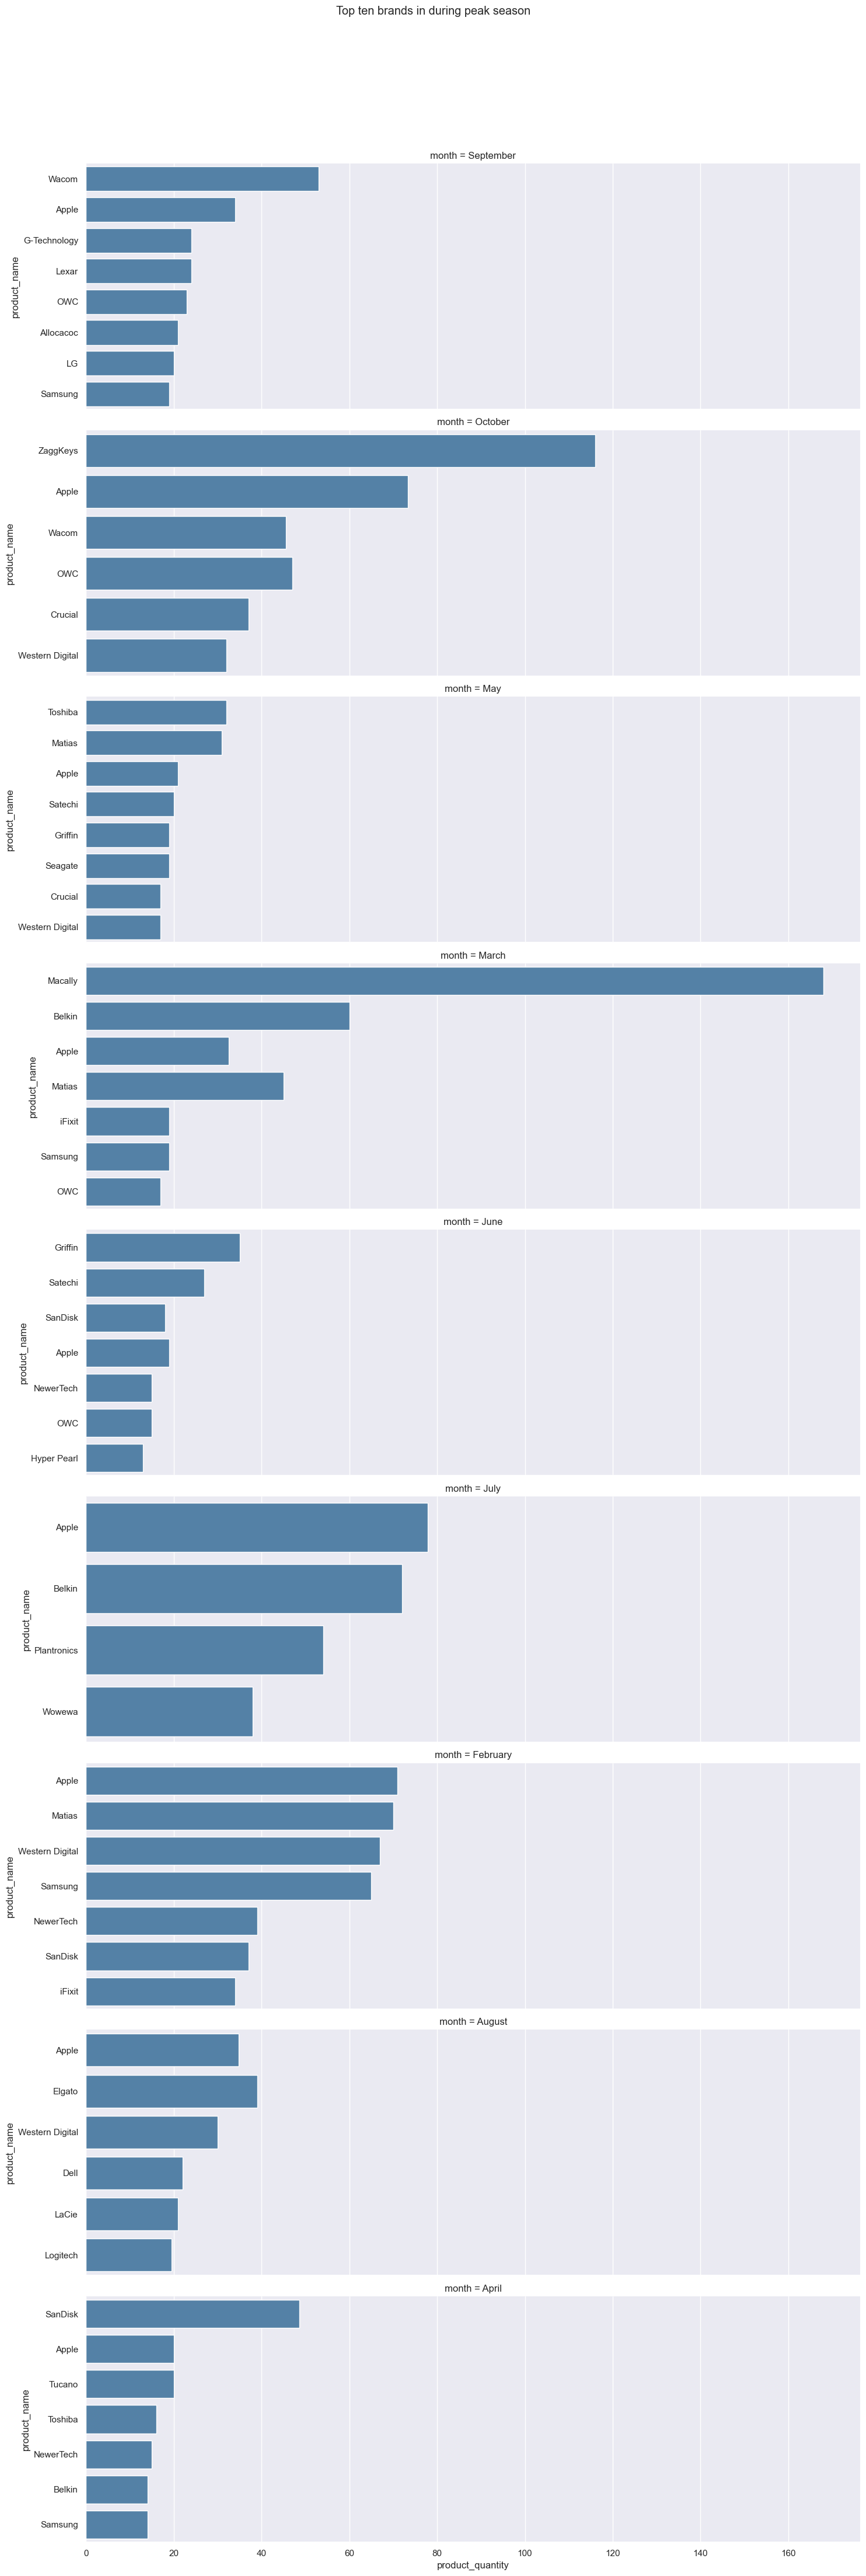

In [120]:
sns.set(font_scale=1)


top_ten = sns.catplot(kind="bar",
            data=top_10_non_peak_months_df,
            x="product_quantity",
            y="long",
            row="month",
            color="steelblue",
            aspect=3,
            ci = None,
            sharey=False)

top_ten.set_axis_labels(y_var="product_name")
    # when we have multiple plots, such as when using col or row, we need to use suptitle, and not the normal title
top_ten.figure.suptitle("Top ten brands in during peak season")
top_ten.figure.subplots_adjust(top=.92)

In [121]:
# top 10 products and brands for these months
top_10_months_df = (
                    filtered_months
                    .groupby(["month", "sku"], as_index=False)
                    ["product_quantity"]
                    .sum()
                    .sort_values(by=["month", "product_quantity"], ascending=False)
                    .groupby("month").head(10)
                    )

In [122]:
# merge with products table to get a full overview of the products their names, description and price

top_10_months_names_df = top_10_months_df.merge(products_cl,
                                                how= 'left',
                                                on= 'sku')

In [123]:
top_10_months_names_df['short'] = top_10_months_names_df['sku'].str[:3]



In [124]:
top_10_months_names_df = top_10_months_names_df.merge(brands,
                                how="left",
                                left_on="short",
                                right_on="short")

In [126]:
top_10_months_names_df.head(3)

,month,sku,product_quantity,name,desc,price,in_stock,type,short,long
0,September,WAC0171,53,Education - Wacom Intuos graphics tablet with pen Draw S White,graphics tablet with pen and digital toolbox for Mac and PC.,79.99,0,1405,WAC,Wacom
1,September,APP1190,43,IPhone AppleCare Protection Plan,Apple Care extended warranty iPhone.,70.00,1,1231,APP,Apple
2,September,APP0698,34,Apple Lightning Cable Connector to USB 1m White (OEM),Apple Lightning USB Cable 1 meter to charge and sync iPhone iPad and iPod,25.00,1,1230,APP,Apple


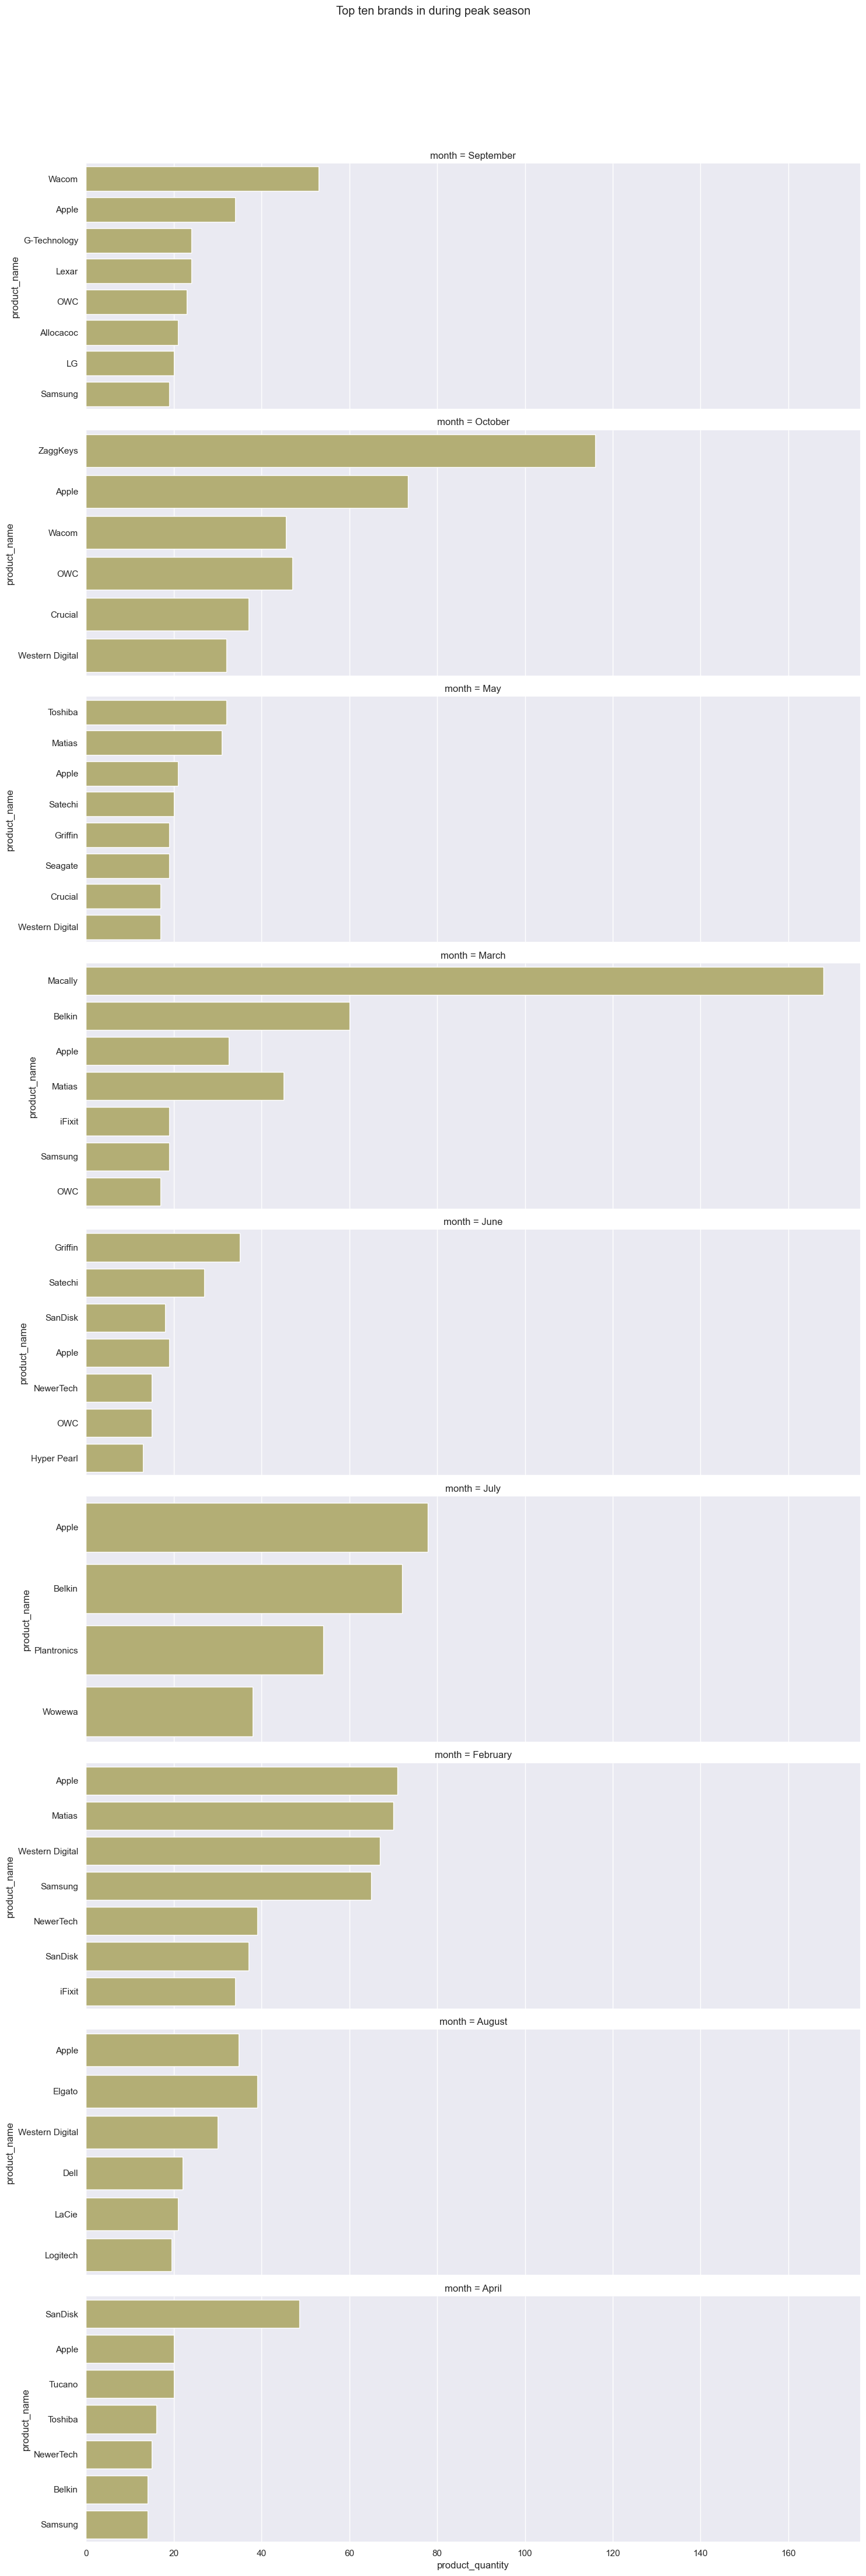

In [127]:
sns.set(font_scale=1)


top_ten = sns.catplot(kind="bar",
            data=top_10_months_names_df,
            x="product_quantity",
            y="long",
            row="month",
            color="darkkhaki",
            aspect=3,
            ci = None,
            sharey=False)

top_ten.set_axis_labels(y_var="product_name")
    # when we have multiple plots, such as when using col or row, we need to use suptitle, and not the normal title
top_ten.figure.suptitle("Top ten brands in during peak season")
top_ten.figure.subplots_adjust(top=.92)



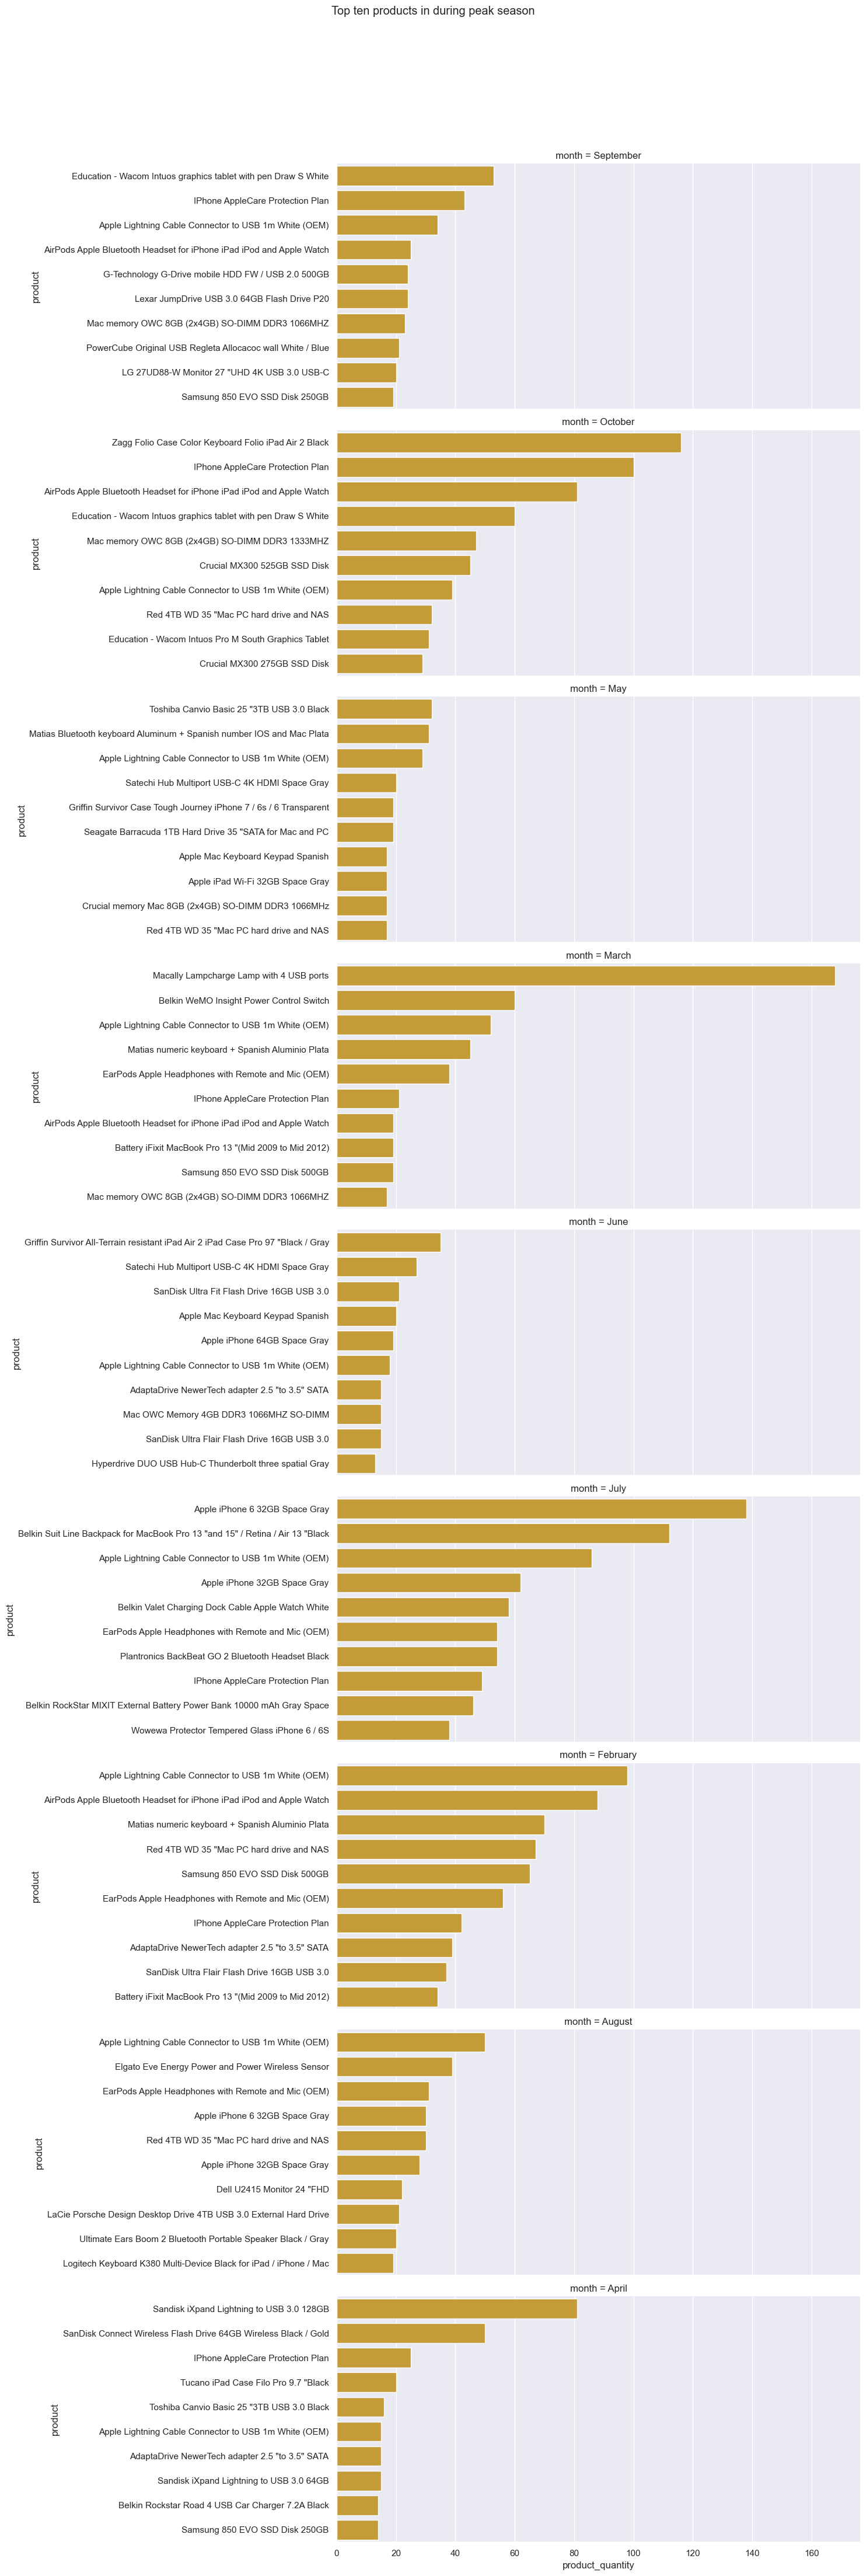

In [128]:
# and what are those products

top_10 = sns.catplot(kind="bar",
            data=top_10_months_names_df,
            x="product_quantity",
            y="name",
            row="month",
            color="goldenrod",
            aspect=3,
            sharey=False)
top_10.set_axis_labels(y_var="product")
    # when we have multiple plots, such as when using col or row, we need to use suptitle, and not the normal title
top_10.figure.suptitle("Top ten products in during peak season")
top_10.figure.subplots_adjust(top=.92)


<div style="background-color: #FADBD8; color: black; border: 1px solid #e9e9e9; padding: 10px; border-radius: 5px;">
    <h5>2.9 CUSTOMER PURCHASING BEHAVIOUR </h5>
</div>



Let's determine whether customers are taking advantange of the discounts. Having previously identified seasonal patterns and sales trends during specific times of the year, we will do an in-depth analysis of customer purchasing behaviour within this time series. 

In [129]:
# calculate revenue between peak sales months
filtered_revenue = eniac_df.loc[eniac_df['date'].between('2017-11-01', '2018-01-31')]['revenue'].sum()
round(filtered_revenue,2)

3296464.48

In [130]:
#get the total revenue for the time period of the data
total_revenue = eniac_df['revenue'].sum()
total_revenue

7817204.4

In [131]:
# compare filtered revenue with rest of the year revenue
difference = total_revenue - filtered_revenue
difference

4520739.92

In [132]:
# calcualte percentage of the difference
percentage_total = round((difference / total_revenue),2) * 100
percentage_total

print(f"The percentage total contribution of peak months to the total revenue is : {percentage_total:.0f}%")

The percentage total contribution of peak months to the total revenue is : 58%


In [ ]:
#let's find out if the sales during this time were from discounted products
filtered_months = eniac_df.loc[eniac_df['date'].between('2017-11-01', '2018-01-31')]['discount'] > 0
filtered_months.sample(50)

In [137]:
# finding percentage of discounted products for the other months

filtered_non_peak_months = eniac_df.loc[~eniac_df['date'].between('2017-11-01', '2018-01-31')]['discount'] > 0
filtered_non_peak_months.sample(50)

8167      True
26558     True
18191     True
22115    False
29301     True
41712     True
41348     True
7548      True
238       True
13246     True
53183     True
25012     True
24208     True
25627     True
48723     True
6420      True
40396     True
18835     True
10455    False
38683     True
21625     True
7604      True
25        True
16007     True
52397     True
32032     True
24865     True
18498     True
20601     True
1776      True
52568     True
7538      True
481       True
41931     True
18150     True
4773     False
19102     True
40205     True
27031     True
16161     True
23909     True
14770     True
12353     True
15271     True
14640     True
13237     True
37897     True
20322    False
32747     True
16949     True
Name: discount, dtype: bool

In [138]:
true_values = filtered_non_peak_months.sum()
true_values

30242

In [139]:
# we can see that not all the sales made were of discounted products but let's see how many were
true_values = filtered_months.sum()
true_values



19162

In [140]:
false_values = (filtered_non_peak_months == False).sum()
false_values

3003

In [141]:
perc_true = round((true_values/ len(filtered_non_peak_months)),2) * 100
perc_true

print(f"{perc_true:.0f}% of sales contributed to the revenue sales between the months of October 2017 to January 2018")

58% of sales contributed to the revenue sales between the months of October 2017 to January 2018


In [142]:
perc_true = round((true_values/ len(filtered_months)),2) * 100
perc_true

print(f"{perc_true:.0f}% of sales contributed to the revenue sales between the months of October 2017 to January 2018")

96% of sales contributed to the revenue sales between the months of October 2017 to January 2018


In [143]:
false_values = (filtered_months == False).sum()
false_values

824

In [144]:
perc_false = round((false_values/ len(filtered_months)),2) * 100
perc_false

print(f"only {perc_false:.0f}% of sales contributed to the revenue sales between the months of October 2017 to January 2018")

only 4% of sales contributed to the revenue sales between the months of October 2017 to January 2018


We can deduce that an exceptionally large quantity products sold during the peak season spanning from October 2017 to January 2018, contributed a substantial amount to the revenue of €3,296,464.48 over that period. However, a close look into the average discounts offered throughout the year can tell us more about the contribution of discounts to this insight. 

<div style="background-color: #FADBD8; color: black; border: 1px solid #e9e9e9; padding: 10px; border-radius: 5px;">
    <h5>2.10 COMPARATIVE ANALYSIS OF NON-PEAK MONTHS </h5>
</div>

In [145]:
# average discount during peak months
avg_discount_peak = eniac_df.loc[eniac_df['date'].between('2017-11-01', '2018-01-31')]['discount'].mean()
avg_discount_peak

28.410451315921147

In [146]:
# average discount during the rest of the year
avg_discount = eniac_df[(eniac_df['date'] < '2017-11-01') | (eniac_df['date'] > '2018-01-31')]['discount'].mean()
avg_discount

24.73771544593172

We can see that, there is not much of a significant difference between the average discount during peak months and the average discounts throughout the year. This could imply that, the discounts offered during peak months do not really make much of a difference to customer purchasing behaviours. Customers could be buying more during this time because of discounts but would probably still buy even without discounts. 

In [147]:
#non_peak_months = eniac_df.loc[(eniac_df['date'].between('2017-01-02', '2017-09-30')) | (eniac_df['date'].between('2018-01-02', '2018-04-30'))]['revenue'].sum()
non_peak_months = eniac_df.loc[(eniac_df['date'].between('2017-01-02', '2017-09-30'))]['revenue'].sum()

round(non_peak_months,2)                
                   

3155153.12

##### non discounted products

In [ ]:
#average % discount for peak months and how much is avg discount for the rest of the time?? what does this tell us about discounts and revenue. find revenue of non peak months then compare

In [148]:
non_peak_months_df = eniac_df[(eniac_df['date'] < '2017-11-1')  | (eniac_df['date'] > '2018-1-31')]#['revenue'].sum()
non_peak_months_df.head(3)


,id,id_order,product_id,product_quantity,sku,unit_price,date,name,desc,price,in_stock,type,discount,revenue,short,long,category,month
0,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,OWC In-line Digital Temperature Sensor Kit HDD iMac 2011,Kit temperature sensor for HDD iMac 21 inch and 27 inch 2011.,60.99,1,12755395,13.50,47.49,OWC,OWC,", desktop",January
1,1120182,299404,0,1,OWC0100,47.49,2017-01-01 22:50:39,OWC In-line Digital Temperature Sensor Kit HDD iMac 2011,Kit temperature sensor for HDD iMac 21 inch and 27 inch 2011.,60.99,1,12755395,13.50,47.49,OWC,OWC,", desktop",January
2,1121550,300650,0,1,OWC0100,49.99,2017-01-02 15:31:09,OWC In-line Digital Temperature Sensor Kit HDD iMac 2011,Kit temperature sensor for HDD iMac 21 inch and 27 inch 2011.,60.99,1,12755395,11.00,49.99,OWC,OWC,", desktop",January
3,1121801,300760,0,1,OWC0100,49.99,2017-01-02 17:20:31,OWC In-line Digital Temperature Sensor Kit HDD iMac 2011,Kit temperature sensor for HDD iMac 21 inch and 27 inch 2011.,60.99,1,12755395,11.00,49.99,OWC,OWC,", desktop",January
4,1124334,301975,0,1,OWC0100,49.99,2017-01-03 20:04:54,OWC In-line Digital Temperature Sensor Kit HDD iMac 2011,Kit temperature sensor for HDD iMac 21 inch and 27 inch 2011.,60.99,1,12755395,11.00,49.99,OWC,OWC,", desktop",January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53226,1647280,526003,0,1,NET0028,404.99,2018-03-12 15:59:19,Netgear Wifi Orbi System kit and satellite network router AC3000 350m,System RBK50 Mesh WiFi network kit compact and extensor router network covered 350 meters expand...,429.99,0,1334,25.00,404.99,NET,NaN,", protection",March
53227,1647425,526066,0,1,WAC0254,83.99,2018-03-12 17:45:42,Education - Wacom Intuos Graphics Tablet S Bluetooth Pistachio Green,small-edge graphics tablet with Bluetooth integrated and creative software worth 110 euros included,99.00,1,1405,15.01,83.99,WAC,Wacom,", tablet",March
53228,1647495,526093,0,1,WAC0252,83.99,2018-03-12 18:32:29,Education - Wacom Intuos Graphics Tablet S Bluetooth Black,small-edge graphics tablet with Bluetooth integrated and creative software worth 110 euros included,99.00,1,1405,15.01,83.99,WAC,Wacom,", tablet",March
53229,1648399,526440,0,1,PAC2235,878.18,2018-03-13 15:08:27,Synology DS218 + NAS Server | 6GB RAM | 16TB (2x8TB) WD Red,NAS storage server integrated with special focus on data protection,1124.98,1,12175397,246.80,878.18,PAC,Pack,", storage, protection, server",March


In [ ]:
monthly_revenue_sum = non_peak_months_df.resample('M', on= 'date')['revenue'].sum()
monthly_revenue_sum

In [ ]:
non_peak_months_df.set_index('date', inplace=True)

In [ ]:
monthly_revenue_sum = non_peak_months_df.resample('M')['revenue'].sum()
monthly_revenue_sum.sort_values(ascending=False).plot(figsize=(8, 6))
plt.xlabel('Date (Monthly)')
plt.ylabel('Revenue')
plt.title('Monthly Revenue of Non Peak Months')
plt.show()

In [ ]:
product_overview_low_disc_regular_df = product_overview_low_disc_df[(product_overview_low_disc_df['date'] < '2017-11-1') | (product_overview_low_disc_df['date'] > '2018-1-31')]

In [ ]:
# Calculate the total sales revenue from discounted products
total_discounted_revenue = (eniac_df['revenue'] * (eniac_df['discount'] / 100)).sum()

print(f"Total sales revenue from discounted products: ${total_discounted_revenue:.2f}")


In [ ]:
#calculate the total sales revenue without discount
total_sales_without_discounts = (eniac_df['product_quantity'] * eniac_df['unit_price']).sum()

print(f"Total sales revenue from discounted products: ${total_sales_without_discounts:.2f}")


<div style="background-color: #FADBD8; color: black; border: 1px solid #e9e9e9; padding: 10px; border-radius: 5px;">
    <h2>3. CONCLUSION</h2>
</div>

1. Eniac should increase discounts during non-peak seasons and incentivize the purchase of low selling itsms and brands
2. Eniac should collect more and higher quality data i.e first-time customers, competitors etc
3. They can keep the discount offers in peak seasons such as Black Friday and Christmas expecially for expensive and medium priced products.